In [2]:
"""
1) Necessary imports:
"""
!rm parser.out
import webwork_parser
reload(webwork_parser)
import Eval_parsed
reload(Eval_parsed)
import pandas as pd
import numpy as np
import json
from zss import simple_distance
#from k_medoids_clustering import ExpressionNode
### Right now import immediately executes clustering. Make import just be an import.

lex: tokens   = ('Q', 'CHOOSE', 'PERMUTE', 'VARIABLE', 'NUMBER', 'PLUS', 'MINUS', 'TIMES', 'DIVIDE', 'LPAREN', 'RPAREN', 'FACTORIAL', 'LSET', 'RSET', 'COMMA', 'EXP', 'LBRACKET', 'RBRACKET', 'COMPUTE')
lex: literals = ''
lex: states   = {'INITIAL': 'inclusive'}
lex: Adding rule t_NUMBER -> '\d*\.?\d+(E(\+|\-)?\d+)?' (state 'INITIAL')
lex: Adding rule t_newline -> '\n+' (state 'INITIAL')
lex: Adding rule t_VARIABLE -> '(?<![A-Za-z])[ABD-OR-Za-z](?![A-Za-z])' (state 'INITIAL')
lex: Adding rule t_EXP -> '\^|(\*\*)' (state 'INITIAL')
lex: Adding rule t_COMPUTE -> 'Compute' (state 'INITIAL')
lex: Adding rule t_RSET -> '\}' (state 'INITIAL')
lex: Adding rule t_RBRACKET -> '\]' (state 'INITIAL')
lex: Adding rule t_LBRACKET -> '\[' (state 'INITIAL')
lex: Adding rule t_PLUS -> '\+' (state 'INITIAL')
lex: Adding rule t_COMMA -> '\,' (state 'INITIAL')
lex: Adding rule t_LPAREN -> '\(' (state 'INITIAL')
lex: Adding rule t_LSET -> '\{' (state 'INITIAL')
lex: Adding rule t_TIMES -> '\*' (state 'INITI

In [13]:
string='(C(32,5)- C(20,5))'
string='(1+2)*(3+4)'
string='C(32,5)'
string='C(52-12,5)'
string='52.0-12.0'
string='12(40!/36!)+(12*11)(39!/36!)'
string='12*(40!/36!)+(12*11)*(39!/36!)'
string='(12*11)(39!/36!)'
string='C(31+4-1,3-1)'
#string='{1,2,3,4,5,6,11,12,13}'
#string='12*(51!/47!)+(12*11)*(50!/47!)'
A=webwork_parser.parse_webwork(string)

In [14]:
A

([['C', [0, 12]],
  [['-', [2, 7]],
   [['+', [2, 5]], [['X', [2, 3]], 31], [['X', [5, 5]], 4]],
   [['X', [7, 7]], 1]],
  [['-', [9, 11]], [['X', [9, 9]], 3], [['X', [11, 11]], 1]]],
 {})

In [15]:
etree=Eval_parsed.eval_parsed(A[0])
print etree

[['C', 561, [0, 12], 'R'], [['-', 34.0, [2, 7], 'R.0'], [['+', 35.0, [2, 5], 'R.0.0'], ['X', 31.0, [2, 3], 'R.0.0.0'], ['X', 4.0, [5, 5], 'R.0.0.1']], ['X', 1.0, [7, 7], 'R.0.1']], [['-', 2.0, [9, 11], 'R.1'], ['X', 3.0, [9, 9], 'R.1.0'], ['X', 1.0, [11, 11], 'R.1.1']]]


In [16]:
Eval_parsed.Collect_numbers(etree)

IndexError: string index out of range

In [17]:
tries=pd.read_json('example_struggle.json')
tries.groupby('user_id').count().head()

,answer_id,answer_string,id,part_id,problem_id,score,set_id,timestamp
user_id,,,,,,,,
a4to,3,3,3,3,3,3,3,3
a5taylor,2,2,2,2,2,2,2,2
a7luong,17,17,17,17,17,17,17,17
abw004,2,2,2,2,2,2,2,2
actsang,7,7,7,7,7,7,7,7


In [18]:
users=list(set(tries['user_id']))

In [19]:
string='C(4*8,5)- C(4*5,5)'
A=webwork_parser.parse_webwork(string)
print A

etree=Eval_parsed.eval_parsed(A)
print etree
HS=Eval_parsed.Collect_numbers(etree)
HS
HG=set(sort(HS.keys()))
HG

([['-', [0, 17]], [['C', [0, 7]], [['*', [2, 4]], [['X', [2, 2]], 4], [['X', [4, 4]], 8]], [['X', [6, 6]], 5]], [['C', [10, 17]], [['*', [12, 14]], [['X', [12, 12]], 4], [['X', [14, 14]], 5]], [['X', [16, 16]], 5]]], {})
Eval_parsed Exception: too many values to unpack
Traceback (most recent call last):
  File "Eval_parsed.py", line 79, in eval_parsed
    [[f,span],op]=e
ValueError: too many values to unpack
None


TypeError: object of type 'NoneType' has no len()

In [224]:
import sys
import traceback
def extract_attempt_trajectory(answers,HG):
    attempts=[]
    i=0
    for answer in answers:
        i+=1
        try:
            #print 'Attempt text="%s"'%answer,
            ptree = webwork_parser.parse_webwork(answer)
            if ptree!= None:
                etree=Eval_parsed.eval_parsed(ptree)
                H=Eval_parsed.Collect_numbers(etree)
                common=sort(list((set(H.keys()) & HG)))
                not_in_correct = sort(list((set(H.keys()) - HG)))
                #print '\t', '['+','.join(['%2.0f'%v for v in common])+']',
                #print '\t', '['+','.join(['%2.0f'%v for v in not_in_correct])+']'
                attempts.append((answer,common,not_in_correct))
        except Exception, e:
            print '||%s||'%answer,
            print 'iPython level exception',e
            #traceback.print_exc()
            pass
    return attempts

In [225]:
extract_attempt_trajectory(['C(8+4-1,4+1)'],HG)

[('C(8+4-1,4+1)', array([ 4.,  5.,  8.]), array([   1.,   11.,   12.,  462.]))]

In [226]:
attempts={}
j=0;
for user in users:
    answers=tries[tries['user_id']==user]['answer_string']
    attempts[user]=extract_attempt_trajectory(answers,HG)
    l1=len(answers)
    l2=len(attempts[user])
    if l2<l1:
        print 'all answers=',len(answers),'well-formed answers=',len(attempts[user])
    j+=1; 
    if j>40: break

||1/((C(12,1)+C(40,4))|| yacc:Syntax error - Empty token
||1-(C(40,5)/C(52/5)|| yacc:Syntax error at 'LexToken(RPAREN,u')',1,17)',location=17
||1-(C(|| yacc:Syntax error - Empty token
all answers= 8 well-formed answers= 5
||(52C5) - (28C5) - (16C5)|| yacc:Syntax error at 'LexToken(NUMBER,5,1,4)',location=4
all answers= 9 well-formed answers= 8
||C(32, 5) + C(12, 50|| yacc:Syntax error - Empty token
||C(32, 5) + C(12, 50)|| iPython level exception factorial() not defined for negative values
all answers= 13 well-formed answers= 11
||((16!/(5!11!)) - ((52!/(47!5!)) - (40!/(5!35!)))|| yacc:Syntax error - Empty token
||((52!/(47!5!)) - (40!/(5!35!))) - ((32!/(5!27!))|| yacc:Syntax error - Empty token
all answers= 22 well-formed answers= 20
||(C(52,5)-(16,5))/C(52,5)|| iPython level exception Unrecognized expression form: 16
||C(52,|| yacc:Syntax error - Empty token
all answers= 17 well-formed answers= 15
||C(52-20, C)|| yacc:Syntax error at 'LexToken(RPAREN,u')',1,10)',location=10
all answe

In [12]:
for user in users:
    print shape(tries[tries['user_id']==user]['answer_string'])
    print attempts[user]

(8,)


KeyError: u'jwk020'

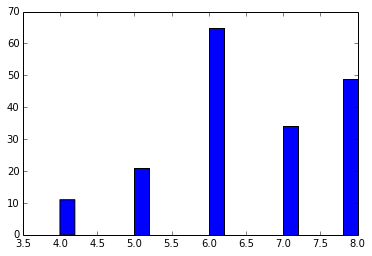

In [73]:
hist([len(tries) for tries in attempts],bins=20);